## Análise Descritiva - Faturamento

In [5]:
import pandas as pd

df = pd.read_csv('arquivo.csv')
df['mes_ano'] = pd.to_datetime(df['mes_ano'])
data = df.groupby(pd.Grouper(key='mes_ano', freq='M')).sum()[['vlvenda', 'vllucro']]
#print(data.head(20))

desc_stats = data[['vlvenda', 'vllucro']].describe()
print(desc_stats)

            vlvenda        vllucro
count  3.100000e+01      31.000000
mean   1.311731e+06  414776.967742
std    3.040399e+05   94449.186858
min    9.159950e+05  308839.000000
25%    1.063222e+06  352645.000000
50%    1.225579e+06  387202.000000
75%    1.499630e+06  465403.500000
max    2.125781e+06  723510.000000


Informações da análise descritiva:

1. Count: número de observações de cada variável.
2. Média: soma de todos os valores/count.
3. Desvio Padrão: mede a dispersão entre os valores observados e a média.
4. Min: menor valor observado.
5. 25%: é o primeiro quartil, divide o conjunto de dados de modo que 25% dos dados estão abaixo desse valor.
6. 50%: é o segundo quartil, divide o conjunto de dados de modo que metade dos valores estejam acima da mediana e metade esteja abaixo da mediana. A mediana é o valor que está no meio do conjunto de dados.
7. 75%: é o terceiro quartil, divide o conjunto de dados de modo que 75% dos dados estejam abaixo desse valor.
8. max: maior valor observado. 

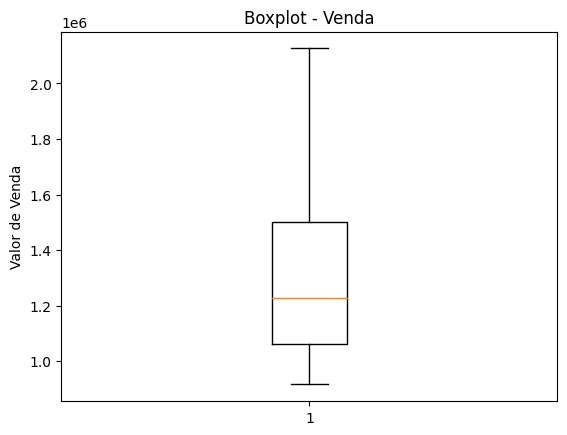

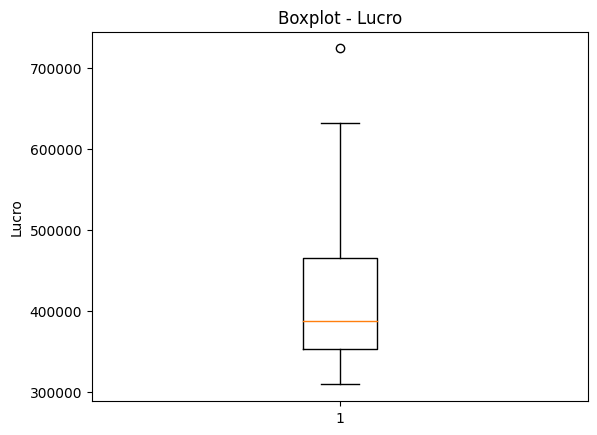

In [9]:
import matplotlib.pyplot as plt

# Boxplot para 'vlvenda'
plt.boxplot(data['vlvenda'])
plt.ylabel('Valor de Venda')
plt.title('Boxplot - Venda')
plt.show()

# Boxplot para 'vllucro'
plt.boxplot(data['vllucro'])
plt.ylabel('Lucro')
plt.title('Boxplot - Lucro')
plt.show()


Bloxplot são baseados em percentis e são um modo rápido de visualizar a distribuição de dados.

- A linha no interior da caixa é a mediana;
- A tem 50% dos dados observados;
- Os pontos fora da caixa e fora da linha são os possiveis outliers.

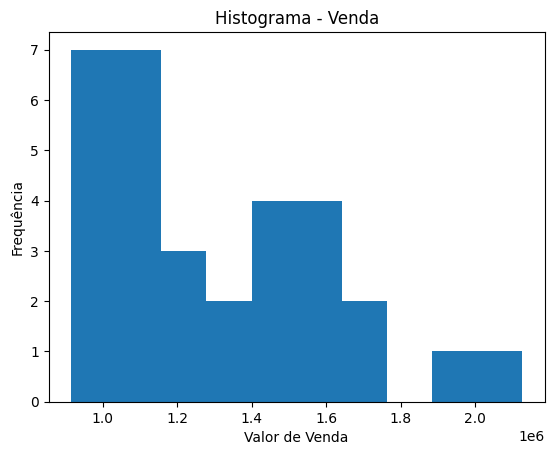

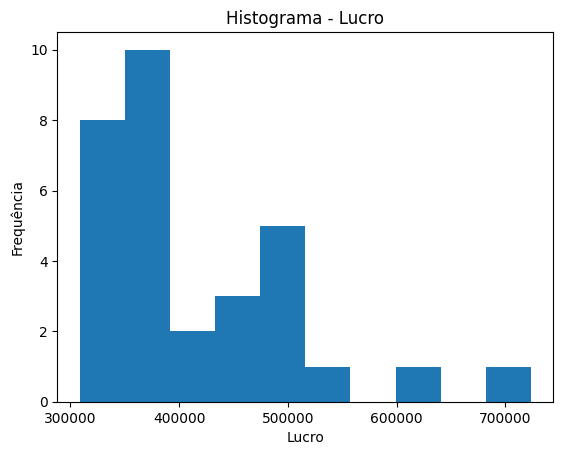

In [10]:
# Histograma para 'vlvenda'
plt.hist(data['vlvenda'], bins=10)
plt.xlabel('Valor de Venda')
plt.ylabel('Frequência')
plt.title('Histograma - Venda')
plt.show()

# Histograma para 'vllucro'
plt.hist(data['vllucro'], bins=10)
plt.xlabel('Lucro')
plt.ylabel('Frequência')
plt.title('Histograma - Lucro')
plt.show()


Histograma é um gráfico que mostra a distribuição dos dados em intervalos.

Observe que em ambos os casos, os picos do histograma estão do lado esquerdo do gráfico, isso significa que a média é maior que a mediana. 

In [13]:
from scipy.stats import kurtosis

# Calcular a curtose da coluna desejada, como 'vlvenda'
curtose_vlvenda = kurtosis(data['vlvenda'])

# Calcular a curtose da coluna 'vllucro'
curtose_vllucro = kurtosis(data['vllucro'])

print(f'Curtose de "vlvenda": {curtose_vlvenda}')
print(f'Curtose de "vllucro": {curtose_vllucro}')

Curtose de "vlvenda": -0.08049382501267699
Curtose de "vllucro": 2.2972864903225227


Curtose é o grau de achatamento de uma distribuição, em relação a distribuição normal.

A curtose negativa indica que a disribuição está menos concentrada nas caudas e mais dispersa em relação ao pico central em comparação com uma distribuição normal.

A curtose positiva sugere que os dados são mais concentrados em torno do pico central e com caudas mais pesadas, em comparação com uma distribuição normal.

In [16]:
from scipy.stats import skew
# Calcular a assimetria da coluna desejada, como 'vlvenda'
assimetria_vlvenda = skew(data['vlvenda'])

# Calcular a assimetria da coluna 'vllucro'
assimetria_vllucro = skew(data['vllucro'])

print(f'Assimetria de "vlvenda": {assimetria_vlvenda}')
print(f'Assimetria de "vllucro": {assimetria_vllucro}')

Assimetria de "vlvenda": 0.8138608376607308
Assimetria de "vllucro": 1.501549492144495


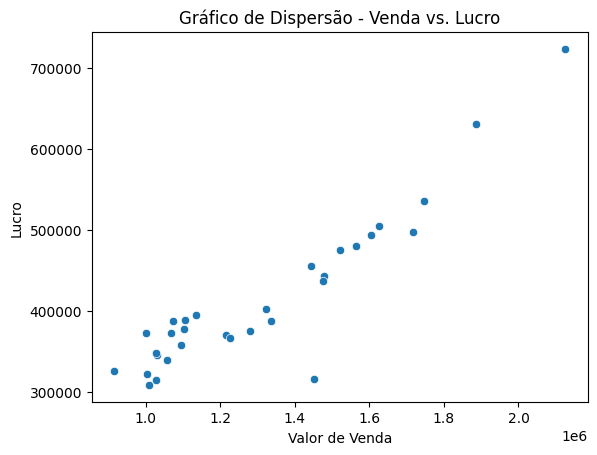

          vlvenda   vllucro
vlvenda  1.000000  0.917729
vllucro  0.917729  1.000000


In [8]:
import seaborn as sns

# Gráfico de dispersão entre 'vlvenda' e 'vllucro'
sns.scatterplot(x='vlvenda', y='vllucro', data=data)
plt.xlabel('Valor de Venda')
plt.ylabel('Lucro')
plt.title('Gráfico de Dispersão - Venda vs. Lucro')
plt.show()

correlation_matrix = data[['vlvenda', 'vllucro']].corr()
print(correlation_matrix)


Correlação: mede o quanto as variáveis se relacionam. 

No caso acima, a correlação 0.91 indica que o vlvenda e vllucro possuem um correlação posiiva forte, indicando que há uma relação positiva entre essas variáveis.

Essa informação pode ser útil para entender a relação entre essas variáveis e auxiliar na tomada de decisões relacionadas a estratégias de vendas e lucratividade.

## Análise Preditiva - Faturamento

### Tratando Previsão de Lucro com modelo de regressão linear

Coeficiente de correlação:  0.9177292370229051
Valor-p:  3.742575644544932e-13
                            OLS Regression Results                            
Dep. Variable:                vllucro   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           3.74e-13
Time:                        14:50:20   Log-Likelihood:                -369.99
No. Observations:                  31   AIC:                             744.0
Df Residuals:                      29   BIC:                             746.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

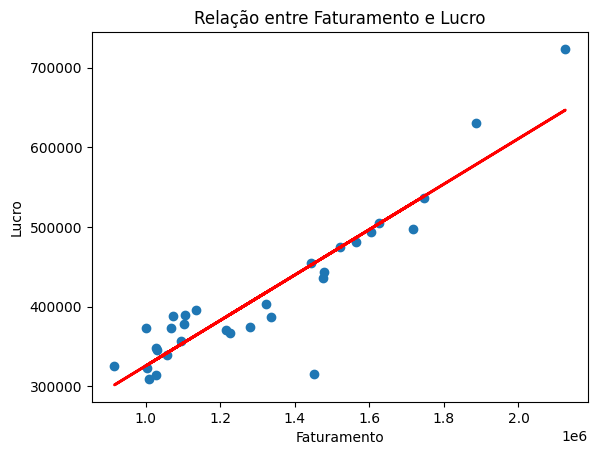

Previsão do lucro para o mês atual é (2023-07): 137722.61


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, shapiro
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from datetime import datetime

def load_data(file_path):
    df = pd.read_csv(file_path)
    df['mes_ano'] = pd.to_datetime(df['mes_ano'])
    data = df.groupby(pd.Grouper(key='mes_ano', freq='M')).sum()[['vlvenda', 'vllucro']]
    return data

def perform_correlation_analysis(X, Y):
    correlation, p_value = pearsonr(X, Y)
    print("Coeficiente de correlação: ", correlation)
    print("Valor-p: ", p_value)

def perform_linear_regression(X, Y):
    y = np.array(Y).reshape(-1, 1)
    X = np.array(X).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    previsoes = model.predict(X)
    return model, previsoes

def perform_hypothesis_test(X, Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    rss = results.ssr
    sst = ((Y - Y.mean()) ** 2).sum()
    ssr = sst - rss
    f_value = (ssr / results.df_model) / (rss / results.df_resid)
    p_value = results.f_pvalue
    print(results.summary())
    print("Estatística F: ", f_value)
    print("Valor-p: ", p_value)

def perform_normality_test(X, Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    residuos = results.resid
    stat, p_valor = shapiro(residuos)
    print("Estatística de teste: ", stat)
    print("Valor-p: ", p_valor)

def plot_scatter(X, Y, model, previsoes):
    plt.scatter(X, Y)
    plt.plot(X, previsoes, color='red', linewidth=2) 
    plt.xlabel('Faturamento')
    plt.ylabel('Lucro')
    plt.title('Relação entre Faturamento e Lucro')
    plt.show()

def main():
    file_path = 'faturamento.csv'
    data = load_data(file_path)
    X = data['vlvenda']
    Y = data['vllucro']

    perform_correlation_analysis(X, Y)

    model, previsoes = perform_linear_regression(X, Y)

    perform_hypothesis_test(X, Y)

    perform_normality_test(X, Y)

    plot_scatter(X, Y, model, previsoes)

    # Previsão para o mês atual
    mes_atual = datetime.now().strftime("%Y-%m")
    faturamento_atual = Y[data.index[-1]]
    lucro_previsto = model.predict([[faturamento_atual]])
    print("Previsão do lucro para o mês atual é ({}): {:.2f}".format(mes_atual, float(lucro_previsto[0])))


if __name__ == '__main__':
    main()



### Tratando previsão mais ou menos lucro usando modelo de regressão logistica

In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from datetime import datetime

# Carregar os dados e agrupar por mês
df = pd.read_csv('faturamento.csv')
df['mes_ano'] = pd.to_datetime(df['mes_ano'])
data = df.groupby(pd.Grouper(key='mes_ano', freq='M')).sum()[['vlvenda', 'vllucro']]

# Criar uma coluna com o lucro do mês anterior
data['lucro_anterior'] = data['vllucro'].shift(1)

# Criar uma coluna indicando se o lucro aumentou (1) ou diminuiu (0) em relação ao mês anterior
data['lucro_aumentou'] = (data['vllucro'] > data['lucro_anterior']).astype(int)

# Remover as linhas com valores ausentes
data = data.dropna()

# Obter o mês atual
mes_atual = datetime.now().strftime("%Y-%m")
print(mes_atual)
# Verificar se a data atual está presente no DataFrame
if mes_atual in data.index:
    # Filtrar o DataFrame para obter o valor de venda do mês atual
    mes_atual_vlvenda = data.loc[mes_atual]['vlvenda']
else:
    print("A data atual não está presente no DataFrame.")

# Separar os dados em variáveis de entrada (X) e variável de destino (y)
X = data[['vlvenda']]
y = data['lucro_aumentou']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Métricas de Avaliação:")
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("Pontuação F1:", f1)
print("Área sob a Curva ROC (ROC AUC):", roc_auc)
print("Matriz de Confusão:")
print(confusion)

# Verificar o balanceamento das classes
class_counts = y.value_counts()
class_imbalance = class_counts[1] / class_counts[0]
print("Desequilíbrio de Classe:", class_imbalance)

# Configurar a validação cruzada e ajustar hiperparâmetros do modelo
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
cv_model.fit(X_train, y_train)

best_params = cv_model.best_params_
best_score = cv_model.best_score_
print("Melhores Parâmetros:", best_params)
print("Melhor Score:", best_score)

# Validar o modelo em dados não vistos
final_model = LogisticRegression(**best_params)
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)

print("Acurácia do Modelo Final em Dados não Vistos:", final_accuracy)


2023-07
Métricas de Avaliação:
Acurácia: 0.6666666666666666
Precisão: 0.0
Recall: 0.0
Pontuação F1: 0.0
Área sob a Curva ROC (ROC AUC): 0.5
Matriz de Confusão:
[[4 0]
 [2 0]]
Desequilíbrio de Classe: 0.5789473684210527


c:\Users\Inko\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Melhores Parâmetros: {'C': 0.001}
Melhor Score: 0.63
Acurácia do Modelo Final em Dados não Vistos: 0.6666666666666666


In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from datetime import datetime

# Carregar os dados e agrupar por mês
df = pd.read_csv('faturamento.csv')
df['mes_ano'] = pd.to_datetime(df['mes_ano'])
data = df.groupby(pd.Grouper(key='mes_ano', freq='M')).sum()[['vlvenda', 'vllucro']]

# Criar uma coluna com o lucro do mês anterior
data['lucro_anterior'] = data['vllucro'].shift(1)

# Remover as linhas com valores ausentes
data = data.dropna()

# Criar uma coluna indicando se o lucro aumentou (1) ou diminuiu (0) em relação ao mês anterior
data['lucro_aumentou'] = (data['vllucro'] > data['lucro_anterior']).astype(int)

# Criar uma coluna com a média móvel de vendas nos últimos três meses
data['media_movel_vendas'] = data['vlvenda'].rolling(window=6).mean()

# Criar uma coluna com a variação percentual nas vendas em relação ao mês anterior
data['variacao_percentual_vendas'] = data['vlvenda'].pct_change()

# Criar uma coluna com o lucro dos últimos três meses
data['lucro_3_meses'] = data['vllucro'].rolling(window=6).sum()

# Criar uma coluna com o desvio padrão do lucro nos últimos seis meses
data['desvio_padrao_lucro'] = data['vllucro'].rolling(window=6).std()

# Obter o mês atual
mes_atual = datetime.now().strftime("%Y-%m")

# Verificar se a data atual está presente no DataFrame
if mes_atual in data.index:
    # Filtrar o DataFrame para obter os valores das colunas relevantes
    mes_atual_features = data.loc[mes_atual][['media_movel_vendas', 'variacao_percentual_vendas', 'lucro_3_meses', 'desvio_padrao_lucro']]
    mes_atual_vlvenda = data.loc[mes_atual]['vlvenda']
else:
    print("A data atual não está presente no DataFrame.")

# Separar os dados em variáveis de entrada (X) e variável de destino (y)
X = data[['vlvenda', 'media_movel_vendas', 'variacao_percentual_vendas', 'lucro_3_meses', 'desvio_padrao_lucro']]
y = data['lucro_aumentou']

# Realizar imputação dos valores ausentes com a média dos valores
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Métricas de Avaliação:")
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("Pontuação F1:", f1)
print("Área sob a Curva ROC (ROC AUC):", roc_auc)
print("Matriz de Confusão:")
print(confusion)


Métricas de Avaliação:
Acurácia: 0.8333333333333334
Precisão: 1.0
Recall: 0.5
Pontuação F1: 0.6666666666666666
Área sob a Curva ROC (ROC AUC): 0.75
Matriz de Confusão:
[[4 0]
 [1 1]]


In [67]:

# Filtrar o DataFrame para obter os valores das colunas relevantes
mes_atual_features = data.loc[mes_atual][['vlvenda', 'media_movel_vendas', 'variacao_percentual_vendas', 'lucro_3_meses', 'desvio_padrao_lucro']]
# Prever o lucro aumentou ou diminuiu para o mês atual
mes_atual_pred = model.predict(imputer.transform(mes_atual_features.values.reshape(1, -1)))
# Verificar se o lucro aumentou ou diminuiu em relação ao mês anterior
if mes_atual_pred == 1:
    resultado = "Você terá mais lucro neste mês em comparação com o mês passado."
else:
    resultado = "Você terá menos lucro neste mês em comparação com o mês passado."

# Imprimir o resultado
print(resultado)


Você terá menos lucro neste mês em comparação com o mês passado.


c:\Users\Inko\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## Análise Prescritiva - Faturamento

### Segmentação de Produtos: Análise por região

In [1]:
import pandas as pd

df = pd.read_csv('arquivo.csv')
grouped_by_regiao = df.groupby('regiao')

for regiao, grupo in grouped_by_regiao:
    print(f"Região: {regiao}")
    
    # Filtrar produtos com vlvenda > 0
    grupo = grupo[grupo['vlvenda'] > 0]

    # média de vlvenda, vllucro e vlcustofin
    media_vlvenda = grupo['vlvenda'].mean()
    media_vllucro = grupo['vllucro'].mean()
    media_vlcusto =  grupo['vlcustofin'].mean()
    print(f"Média de Venda: {media_vlvenda}")
    print(f"Média de Lucro: {media_vllucro}")
    print(f"Média de Custo: {media_vlcusto}")
    print("\n")
    
    # Produtos mais vendidos na região
    produtos_mais_vendidos = grupo['produto'].value_counts().head(10)
    print("Produtos Mais Vendidos:")
    print(produtos_mais_vendidos)
    print("\n")
    
    # Produtos menos vendidos na região
    produtos_menos_vendidos = grupo['produto'].value_counts().tail(10)
    print("Produtos Menos Vendidos:")
    print(produtos_menos_vendidos)
    print("\n")
    
    # Produto com maior vlcustofin na região
    produto_maior_custo = grupo.loc[grupo['vlcustofin'].idxmax()]
    print("Produto com Maior Vlcustofin:")
    print(produto_maior_custo[['produto', 'vlvenda', 'vllucro', 'vlcustofin']])
    print("\n")
    
    # Produto com menor vlcustofin na região
    produto_menor_custo = grupo.loc[grupo['vlcustofin'].idxmin()]
    print("Produto com Menor Vlcustofin:")
    print(produto_menor_custo[['produto', 'vlvenda', 'vllucro', 'vlcustofin']])
    print("\n")
    
    # Produto com maior vlvenda na região
    produto_maior_venda = grupo.loc[grupo['vlvenda'].idxmax()]
    print("Produto com Maior Vlvenda:")
    print(produto_maior_venda[['produto', 'vlvenda', 'vllucro', 'vlcustofin']])
    print("\n")
    
    # Produto com menor vlvenda na região
    produto_menor_venda = grupo.loc[grupo['vlvenda'].idxmin()]
    print("Produto com Menor Vlvenda:")
    print(produto_menor_venda[['produto', 'vlvenda', 'vllucro', 'vlcustofin']])
    print("\n")
    
    # Produto com maior vllucro na região
    produto_maior_lucro = grupo.loc[grupo['vllucro'].idxmax()]
    print("Produto com Maior Vllucro:")
    print(produto_maior_lucro[['produto', 'vlvenda', 'vllucro', 'vlcustofin']])
    print("\n")
    
    # Produto com menor vllucro na região
    produto_menor_lucro = grupo.loc[grupo['vllucro'].idxmin()]
    print("Produto com Menor Vllucro:")
    print(produto_menor_lucro[['produto', 'vlvenda', 'vllucro', 'vlcustofin']])
    print("\n")


FileNotFoundError: [Errno 2] No such file or directory: 'faturamento.csv'

Recomendação de produtos por região


In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

historico_compras_regiao = []
regioes = []

for regiao, grupo in grouped_by_regiao:
    regioes.append(regiao)
    produtos_comprados = grupo['produto'].tolist()
    historico_compras_regiao.append(produtos_comprados)

mlb = MultiLabelBinarizer()
historico_encoded = mlb.fit_transform(historico_compras_regiao)

similaridade_produto_regiao = cosine_similarity(historico_encoded)
df_similaridade = pd.DataFrame(similaridade_produto_regiao, columns=regioes, index=regioes)
df_similaridade.replace(np.nan, 0, inplace=True)

def recomendar_produtos_por_regiao(regiao, n=10):
    if regiao not in df_similaridade.columns:
        print(f"A região {regiao} não está presente na análise de similaridade.")
        return []

    # Obter os produtos mais vendidos na região
    produtos_mais_vendidos = df[df['regiao'] == regiao].sort_values(by='qtvenda', ascending=False).head(n)['produto']

    # Obter os produtos com maior lucro na região
    produtos_maior_lucro = df[df['regiao'] == regiao].sort_values(by='vllucro', ascending=False).head(n)['produto']

    # Combinar os produtos mais vendidos e com maior lucro
    produtos_recomendados = set(produtos_mais_vendidos).union(set(produtos_maior_lucro))

    return list(produtos_recomendados)


In [2]:

# List to store recommended products for each region
recommended_products_by_region = []

# Iterate over each region in the dataframe
for region in df['regiao'].unique():
    recommended_products = recomendar_produtos_por_regiao(region)
    recommended_products_by_region.append(recommended_products)

# Display the recommended products for each region
for region, recommended_products in zip(df['regiao'].unique(), recommended_products_by_region):
    print(f"Recommended products for {region}:")
    print(recommended_products)
    print()



NameError: name 'df' is not defined

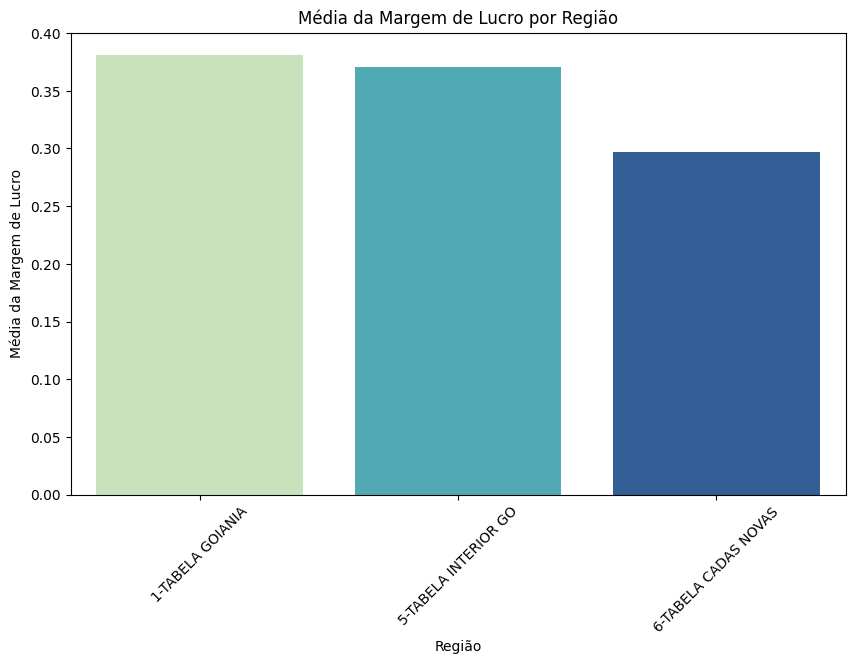

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a margem de lucro para cada venda
df['margem_lucro'] = df['vllucro'] / df['vlvenda']

# Agrupar as vendas por região e calcular a média da margem de lucro
margem_por_regiao = df.groupby('regiao')['margem_lucro'].mean()

# Visualizar a média da margem de lucro por região
plt.figure(figsize=(10, 6))
sns.barplot(x=margem_por_regiao.index, y=margem_por_regiao.values, palette='YlGnBu')
plt.title('Média da Margem de Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Média da Margem de Lucro')
plt.xticks(rotation=45)


plt.show()
